# Multilayer Perceptron (MLP)

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU, Flatten

import matplotlib.pyplot as plt

from utils import evaluate_classification_metrics

In [42]:
data = pd.read_csv('creditcard.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Hint: .get(a, b) is a method of a dictionary that returns the value for key a if it exists, otherwise it returns b. For example, d.get('a', 0) will return d['a'] if 'a' is in d, otherwise it will return 0.

Tokenize the sentences and compute the vocabulary of the exercise

Calculate priors

In [43]:
priors = {}
total_docs = len(y_train)
for value in y_train:
    label = value
    if label not in priors:
        priors[label] = 0
    priors[label] += 1

for label in priors:
    priors[label] /= total_docs

print('Class Priors:', priors)

Class Priors: {np.int64(0): 0.9982707542408216, np.int64(1): 0.001729245759178389}


Calculate the amount of words per class

## Multilayer Perceptron (MLP) for Credit Card Fraud Detection

In [45]:
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
# Create a simple MLP
#model = Sequential([ 
 #   Dense(64),  # Equivale a nn.Linear(29, 64)
  #  ReLU(),                        # Equivale a nn.ReLU()
   # Dropout(0.6),                  # Equivale a nn.Dropout(0.4)
    #Dense(2, activation='softmax') # Equivale a nn.Linear(64, 2)
#])
model = Sequential()

# NN layers
model.add(Flatten()) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Calcular pesos de clase personalizados
n_samples = len(y_train_balanced)
n_classes = 2
class_weights = {0: n_samples / (n_classes * np.bincount(y_train_balanced)[0]),
                1: n_samples / (n_classes * np.bincount(y_train_balanced)[1])}

# Optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model with class weights
history = model.fit(X_train_balanced, y_train_balanced, 
                   epochs=1, 
                   validation_split=0.25, 
                   verbose=1)
print(f"Training Loss: {history.history['loss'][-1]:.4f}", 
      f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Loss: {loss:.4f} - Accuracy: {accuracy:.4f}')


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

10662/10662 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.9814 - loss: 0.0553 - val_accuracy: 0.9997 - val_loss: 0.0040
Training Loss: 0.0236 Training Accuracy: 0.9925
Loss: 0.0115 - Accuracy: 0.9978


In [46]:
y_pred = model.predict(X_test_scaled)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold for F1:", best_threshold)

y_pred_classes = (y_pred > best_threshold).astype(int)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Best threshold for F1: 0.9919138


Confusion Matrix:
[[56844    20]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



{'Confusion Matrix': [np.int64(56864),
  np.int64(0),
  np.int64(71),
  np.int64(27)],
 'Accuracy': np.float64(0.99875355500158),
 'Precision': np.float64(1.0),
 'Recall': np.float64(0.2755102040816326),
 'Specificity': np.float64(1.0),
 'F1 Score': np.float64(0.43199999999999994)}

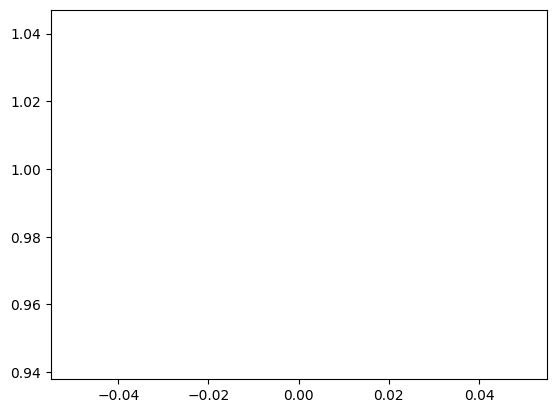

In [48]:
# Test the model and evaluate performance
threshold = 0.9919138

y_pred_classes = np.where(y_pred > threshold, 1, 0)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])

evaluate_classification_metrics(y_test, y_pred, 1)